In [ ]:
# Import necessary libraries
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers, models
from keras.layers import Input

# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the CNN model
model = models.Sequential()

# Define input shape using Input layer
model.add(Input(shape=(28, 28, 1)))

# Add convolutional and other layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


# Save the trained model
model.save('my_model.keras')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9552 - loss: 0.1189 - val_accuracy: 0.9076 - val_loss: 0.2895
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9630 - loss: 0.1010 - val_accuracy: 0.9130 - val_loss: 0.2840
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9678 - loss: 0.0889 - val_accuracy: 0.9114 - val_loss: 0.2997
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9708 - loss: 0.0765 - val_accuracy: 0.9103 - val_loss: 0.3094
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9751 - loss: 0.0684 - val_accuracy: 0.9111 - val_loss: 0.3379
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9774 - loss: 0.0618 - val_accuracy: 0.9118 - val_loss: 0.3556
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9784 - loss: 0.0583 - val_accuracy: 0.9092 - val_loss: 0.3717
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9800 - loss: 0.0566 - 

predict

This code loads the trained model and makes predictions for two sample images from the test set.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


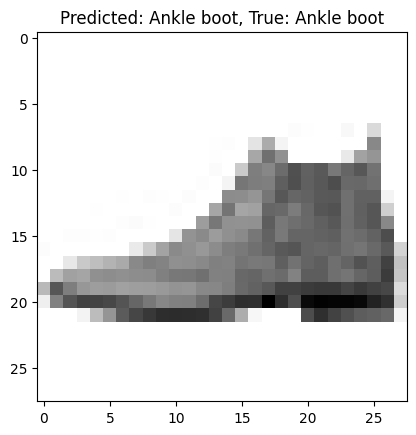

Image 1 Interpretation:
The model predicted the image as: Ankle boot
The actual label for the image is: Ankle boot
The model prediction is correct.



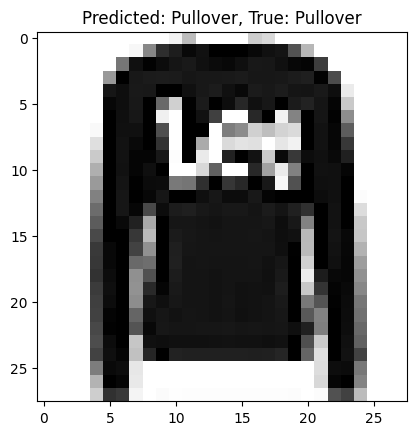

Image 2 Interpretation:
The model predicted the image as: Pullover
The actual label for the image is: Pullover
The model prediction is correct.



In [1]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the model
model = load_model('my_model.keras')

# Load dataset
(_, _), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess test images
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions for two images
predictions = model.predict(test_images[:2])

# Display the predictions and images with interpretations
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    plt.title(f"Predicted: {class_names[predicted_label]}, True: {class_names[true_label]}")
    plt.show()

    # Interpretation
    print(f"Image {i+1} Interpretation:")
    print(f"The model predicted the image as: {class_names[predicted_label]}")
    print(f"The actual label for the image is: {class_names[true_label]}")
    
    if predicted_label == true_label:
        print("The model prediction is correct.\n")
    else:
        print("The model prediction is incorrect.\n")
